# 1. Import Libraries

In [51]:
# Standard Library
import os
import warnings
from itertools import combinations, product

# Third-party Libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
from joblib import Parallel, delayed
import requests

# Selenium for Web Scraping
from selenium import webdriver
from selenium.webdriver.common.by import By

# Biopython for Sequence Alignment
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment

# Suppress Deprecation Warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 2. Import Dataset

In [2]:
df = pd.read_csv("./data_hiv_type_1/ayurvedic-knapsack-grouped-bindingdb-cleaner-exploded.csv")
df.head()

C:\Users\M S I\AppData\Local\Temp\ipykernel_24240\166433913.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data_hiv_type_1/ayurvedic-knapsack-grouped-bindingdb-cleaner-exploded.csv")


,C_ID,Name,Common Name,Scientific Name,Quantity,Non plant ingredient,Action,Application,Comments,Bacteria,...,Mw,CAS RN,InChIKey,InChICode,SMILES,target_name,species,bdb_id,ligand_smiles,pdb_link
0,"C00000003,","Anantadikwath (240gm), Drakshadi Kwath (40gm),...","Raisin, Grape, Purging Cassia, Long Melon, Cuc...","Vitis vinifera, Cassia fistula, Cucumis melo, ...","20gm, 10gm, 25gm, 380gm, 80gm, 100gm, 50gm","Salt, Sodium chioride: 10gm; Sea Shell, Gallip...","Curative curbancle, diarrhoea,Blood poisoning,...",NaN,NaN,"0.0, 1.0",...,346.141638,77-06-5,IXORZMNAPKEEDV-BKYUDGNBNA-N,"InChI=1S/C19H22O6/c1-9-7-17-8-18(9,24)5-3-10(1...",C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@H](O...,Protease,(Human immunodeficiency virus type 1),BDBM50478896,C[C@H]1[C@@H]2CC[C@](C)(O)[C@@H]3[C@H]4[C@@H]5...,https://www.rcsb.org/search?request=%7B%22quer...
1,"C00000003,","Anantadikwath (240gm), Drakshadi Kwath (40gm),...","Raisin, Grape, Purging Cassia, Long Melon, Cuc...","Vitis vinifera, Cassia fistula, Cucumis melo, ...","20gm, 10gm, 25gm, 380gm, 80gm, 100gm, 50gm","Salt, Sodium chioride: 10gm; Sea Shell, Gallip...","Curative curbancle, diarrhoea,Blood poisoning,...",NaN,NaN,"0.0, 1.0",...,346.141638,77-06-5,IXORZMNAPKEEDV-BKYUDGNBNA-N,"InChI=1S/C19H22O6/c1-9-7-17-8-18(9,24)5-3-10(1...",C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@H](O...,Nuclear factor NF-kappa-B p105 subunit,(Human),BDBM50561592,C[C@@]12[C@H]3[C@H](C(O)=O)[C@@]45CC(=C)[C@@](...,https://www.rcsb.org/search?request=%7B%22quer...
2,"C00000003,","Anantadikwath (240gm), Drakshadi Kwath (40gm),...","Raisin, Grape, Purging Cassia, Long Melon, Cuc...","Vitis vinifera, Cassia fistula, Cucumis melo, ...","20gm, 10gm, 25gm, 380gm, 80gm, 100gm, 50gm","Salt, Sodium chioride: 10gm; Sea Shell, Gallip...","Curative curbancle, diarrhoea,Blood poisoning,...",NaN,NaN,"0.0, 1.0",...,346.141638,77-06-5,IXORZMNAPKEEDV-BKYUDGNBNA-N,"InChI=1S/C19H22O6/c1-9-7-17-8-18(9,24)5-3-10(1...",C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@H](O...,Transcription factor p65,(Human),BDBM50561592,C[C@@]12[C@H]3[C@H](C(O)=O)[C@@]45CC(=C)[C@@](...,https://www.rcsb.org/search?request=%7B%22quer...
3,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,332.162374,468-44-0,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Tyrosine-protein phosphatase non-receptor type...,(Human),BDBM50050955,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...
4,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,332.162374,468-44-0,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Tyrosine-protein phosphatase non-receptor type...,(Human),BDBM50050955,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...


# 3. Explore Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569933 entries, 0 to 569932
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   C_ID                  569933 non-null  object 
 1   Name                  569933 non-null  object 
 2   Common Name           569933 non-null  object 
 3   Scientific Name       569933 non-null  object 
 4   Quantity              569933 non-null  object 
 5   Non plant ingredient  527924 non-null  object 
 6   Action                569933 non-null  object 
 7   Application           36359 non-null   object 
 8   Comments              36348 non-null   object 
 9   Bacteria              569933 non-null  object 
 10  Metabolite Name       569933 non-null  object 
 11  Formula               569933 non-null  object 
 12  Mw                    569933 non-null  float64
 13  CAS RN                562892 non-null  object 
 14  InChIKey              561855 non-null  object 
 15  

Get to Know the Unique Values in the 'Species' Column of the Dataset

In [4]:
df["species"].value_counts()

species
(Human)                                           372921
(Rat)                                              69968
(Bovine)                                           16297
(Mouse)                                            11836
(Human immunodeficiency virus type 1)               9050
                                                   ...  
(Pseudomonas paucimobilis)                             1
(Salmonella enterica)                                  1
(Neosartorya fumigata (Aspergillus fumigatus))         1
(Neuwied's lancehead)                                  1
(Eastern diamondback rattlesnake)                      1
Name: count, Length: 254, dtype: int64

# 4. Filter the Original Dataset to Include Only Rows Where Species is 'Human Immunodeficiency Virus type 1'

In [5]:
df_hiv1 = df.loc[df["species"] == "(Human immunodeficiency virus type 1)"]
df_hiv1 = df_hiv1.copy(deep=True)
df_hiv1.loc[:, "C_ID"] = df_hiv1["C_ID"].astype(str).str.rstrip(",")

In [6]:
df_hiv1.head()

,C_ID,Name,Common Name,Scientific Name,Quantity,Non plant ingredient,Action,Application,Comments,Bacteria,...,Mw,CAS RN,InChIKey,InChICode,SMILES,target_name,species,bdb_id,ligand_smiles,pdb_link
0,C00000003,"Anantadikwath (240gm), Drakshadi Kwath (40gm),...","Raisin, Grape, Purging Cassia, Long Melon, Cuc...","Vitis vinifera, Cassia fistula, Cucumis melo, ...","20gm, 10gm, 25gm, 380gm, 80gm, 100gm, 50gm","Salt, Sodium chioride: 10gm; Sea Shell, Gallip...","Curative curbancle, diarrhoea,Blood poisoning,...",NaN,NaN,"0.0, 1.0",...,346.141638,77-06-5,IXORZMNAPKEEDV-BKYUDGNBNA-N,"InChI=1S/C19H22O6/c1-9-7-17-8-18(9,24)5-3-10(1...",C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@H](O...,Protease,(Human immunodeficiency virus type 1),BDBM50478896,C[C@H]1[C@@H]2CC[C@](C)(O)[C@@H]3[C@H]4[C@@H]5...,https://www.rcsb.org/search?request=%7B%22quer...
7,C00000004,"Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,332.162374,468-44-0,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Gag-Pol polyprotein [489-587],(Human immunodeficiency virus type 1),BDBM50613450,CC(=C)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2...,https://www.rcsb.org/search?request=%7B%22quer...
24,C00000004,"Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,332.162374,468-44-0,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Glycogen phosphorylase,(Human immunodeficiency virus type 1),BDBM50050957,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...
25,C00000004,"Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,332.162374,468-44-0,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,muscle form,(Human immunodeficiency virus type 1),BDBM50050952,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...
26,C00000004,"Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,332.162374,468-44-0,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Protein kinase C epsilon type,(Human immunodeficiency virus type 1),BDBM50050955,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...


In [7]:
print(f"df_hiv1 shape : {df_hiv1.shape}")

df_hiv1 shape : (9050, 22)


In [8]:
df_hiv1["C_ID"].value_counts()

C_ID
C00004567    60
C00001036    58
C00029540    58
C00003886    58
C00013328    57
             ..
C00064531     1
C00064473     1
C00064472     1
C00064453     1
C00064366     1
Name: count, Length: 1199, dtype: int64

In [9]:
print(f"Number of unique compound IDs (C_ID) in the HIV-1 dataset: {len(df_hiv1['C_ID'].unique())}")

Number of unique compound IDs (C_ID) in the HIV-1 dataset: 1199


In [ ]:
# Group the dataframe by 'bdb_id' and aggregate 'C_ID' values
cid_grouped_by_bdb = (
    df_hiv1.groupby("bdb_id")["C_ID"]
    .agg(
        # Create a comma-separated string of unique, sorted C_IDs
        C_IDs=lambda x: ", ".join(map(str, sorted(set(x)))),
        # Count the number of unique C_IDs per bdb_id
        count=lambda x: x.nunique()
    )
    # Sort the results by the count of unique C_IDs in descending order
    .sort_values(by="count", ascending=False)
    # Reset the index to turn 'bdb_id' back into a column
    .reset_index()
)

# Save the resulting DataFrame to a CSV file
cid_grouped_by_bdb.to_csv("./data_hiv_type_1_new/cid_grouped_by_bdb.csv", index=False)

# Display the first few rows of the DataFrame
cid_grouped_by_bdb.head()

,bdb_id,C_IDs,count
0,BDBM50241367,"C00001017, C00002374, C00002376, C00002378, C0...",160
1,BDBM50056315,"C00001017, C00002374, C00002376, C00002378, C0...",156
2,BDBM50213414,"C00001017, C00002374, C00002376, C00002378, C0...",154
3,BDBM50478870,"C00001017, C00002374, C00002376, C00002387, C0...",123
4,BDBM50407724,"C00004131, C00004217, C00004220, C00004224, C0...",110


# 5. Scrapping Protein Code From pdb_link

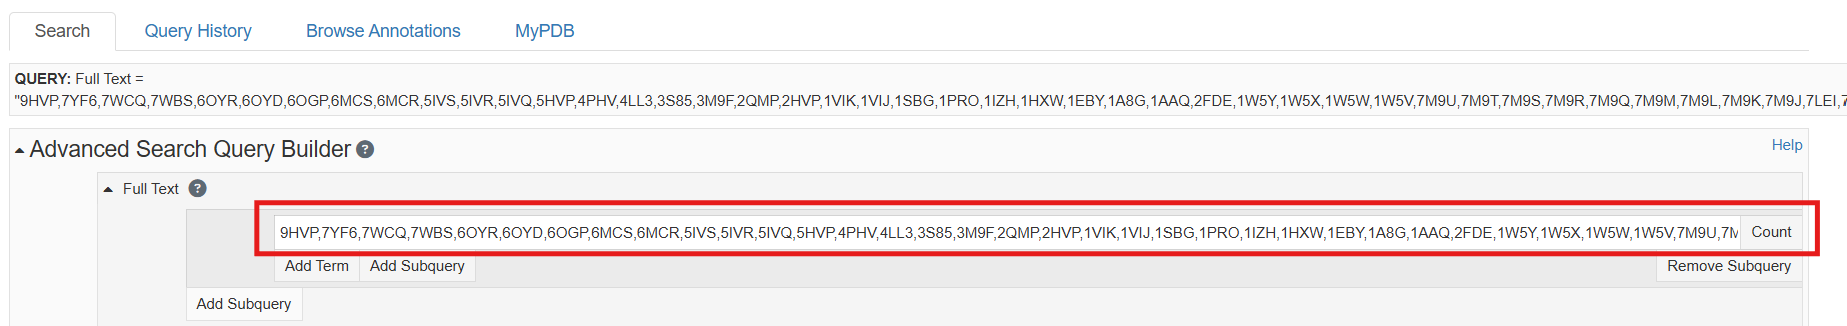

In [ ]:
# Initialize Chrome driver
driver = webdriver.Chrome()

# Add an empty 'query' column
df_hiv1.loc[:, "query"] = None

# Iterate over each row with a progress bar
for index, row in tqdm(df_hiv1.iterrows(), total=df_hiv1.shape[0], desc="Processing", unit="row"):
    link = row["pdb_link"]
    driver.get(link)

    try:
        # Find the input element by CSS selector
        input_element = driver.find_element(By.CSS_SELECTOR, "input[type='text'][placeholder='Enter one or more search terms.']")

        # Extract value if input element is found
        if input_element:
            df_hiv1.at[index, 'query'] = input_element.get_attribute('value')
        else:
            print(f"[Row {index}] Input element not found.")

    except Exception as e:
        print(f"[Row {index}] An error occurred: {e}")

# Close the browser after processing
driver.quit()

# Display the first few rows of the updated DataFrame
print(df_hiv1.head())

In [ ]:
df_hiv1.to_csv("./data_hiv_type_1_new/ayurvedic-knapsack-grouped-bindingdb-cleaner-exploded-hiv-only-n-query.csv")

# 6. Extract the unique HIV protein codes contained within the Query column of the dataset.

In [ ]:
df_hiv1 = pd.read_csv("./dataset/ayurvedic-knapsack-grouped-bindingdb-cleaner-exploded-hiv-only-n-query.csv")
df_hiv1 = df_hiv1.drop("Unnamed: 0", axis=1)
df_hiv1.loc[:, "C_ID"] = df_hiv1["C_ID"].astype(str).str.rstrip(",")

df_hiv1[["C_ID", "bdb_id", "query"]].head()

,C_ID,bdb_id,query
0,C00000003,BDBM50478896,"9HVP,7YF6,7WCQ,7WBS,6OYR,6OYD,6OGP,6MCS,6MCR,5..."
1,C00000004,BDBM50613450,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1..."
2,C00000004,BDBM50050957,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1..."
3,C00000004,BDBM50050952,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1..."
4,C00000004,BDBM50050955,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1..."


In [24]:
# Extract the 'query' column values as a list of strings
query_data = df_hiv1["query"].tolist()

# Initialize an empty list to hold all protein codes
protein_codes = []

# Iterate through each query string and split by comma to separate protein codes
for query in query_data:
    protein_codes.extend(query.split(","))

# Remove duplicates by converting to a set, then back to a list
unique_protein_codes = list(set(protein_codes))

# Create a DataFrame from the list of unique HIV protein codes
unique_protein_codes_df = pd.DataFrame(unique_protein_codes, columns=["HIV Protein Code"])

# Display the first few rows of the resulting DataFrame
unique_protein_codes_df.head()

,HIV Protein Code
0,7SEP
1,6OXU
2,1B92
3,6P1I
4,1S6P


In [23]:
unique_protein_codes_df.to_csv("./dataset/unique_protein_codes.csv", index=False)

# 7. Scrape and append the structural title for each unique HIV protein code by visiting its corresponding detail page

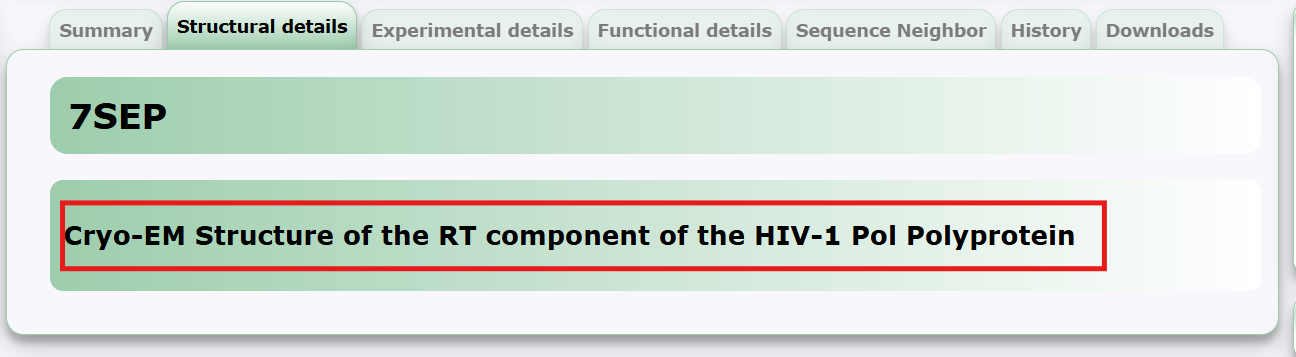

In [27]:
# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# Rename the DataFrame to a more descriptive variable name
unique_protein_codes_df["title"] = None  # Add a new column to store titles

# Iterate through each row in the DataFrame to scrape titles from the webpage
for index, row in tqdm(unique_protein_codes_df.iterrows(), total=unique_protein_codes_df.shape[0], desc="Processing", unit="row"):
    # Build the URL using the current protein code
    link = f"https://pdbj.org/mine/structural_details/{row['HIV Protein Code']}"

    # Navigate to the webpage
    driver.get(link)

    try:
        # Try to locate the h2 element under the PDBExplorerPlane section
        title_element = driver.find_element(By.CSS_SELECTOR, "#PDBExplorerPlane h2")

        if title_element:
            # Extract and store the text content of the title
            title_value = title_element.text
            unique_protein_codes_df.at[index, 'title'] = title_value
        else:
            print("Title element not found on the page.")

    except Exception as e:
        # Print the error message if something goes wrong
        print(f"An error occurred while processing row {index}: {e}")

# Close the browser once scraping is complete
driver.quit()

Processing: 100%|██████████| 984/984 [05:50<00:00,  2.81row/s]


In [28]:
# Save the final DataFrame to an Excel file
unique_protein_codes_df.to_csv("./dataset/hiv-protein-code-title.csv", index=False)

# Display the first few rows of the final DataFrame
unique_protein_codes_df.head()

,HIV Protein Code,title
0,7SEP,Cryo-EM Structure of the RT component of the H...
1,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99
2,1B92,MOBILITY OF AN HIV-1 INTEGRASE ACTIVE SITE LOO...
3,6P1I,Structure of HIV-1 Reverse Transcriptase (RT) ...
4,1S6P,CRYSTAL STRUCTURE OF HUMAN IMMUNODEFICIENCY VI...


# 8. Download FASTA files for each unique HIV protein code by fetching data from the PDBj API and saving it locally

In [30]:
# Define the folder where FASTA files will be saved
save_folder = "./dataset/hiv1_fasta_files"
os.makedirs(save_folder, exist_ok=True)  # Create the folder if it doesn't already exist

# Counter to keep track of successful downloads
counter = 0

# Loop through each row to download the corresponding FASTA file
for index, row in tqdm(unique_protein_codes_df.iterrows(), total=unique_protein_codes_df.shape[0], desc="Downloading FASTA Files"):
    hiv_protein_code = row["HIV Protein Code"]
    
    # Construct the URL for the FASTA file
    url = f"https://pdbj.org/rest/newweb/fetch/file?cat=pdb&type=fasta&id={hiv_protein_code}"
    
    # Define the file path where the FASTA file will be saved
    file_path = os.path.join(save_folder, f"{hiv_protein_code}.tsv")

    try:
        # Send GET request to download the file
        response = requests.get(url, stream=True)

        if response.status_code == 200:
            # Write the downloaded content to the file in chunks
            with open(file_path, "wb") as file:
                for chunk in response.iter_content(chunk_size=1024):  
                    file.write(chunk)
            counter += 1  # Increment counter on successful save
        else:
            print(f"Failed to download {hiv_protein_code} (Status Code: {response.status_code})")

    except Exception as e:
        # Catch and display any exceptions during the request
        print(f"An error occurred while downloading {hiv_protein_code}: {e}")

# Print summary of successfully saved files
print(f"A total of {counter} files were successfully saved.")

An error occurred while downloading 1TVR: HTTPSConnectionPool(host='pdbj.org', port=443): Max retries exceeded with url: /rest/newweb/fetch/file?cat=pdb&type=fasta&id=1TVR (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001F44A2E87D0>, 'Connection to pdbj.org timed out. (connect timeout=None)'))


Failed to download 5HOT (Status Code: 404)


An error occurred while downloading 5OI8: HTTPSConnectionPool(host='pdbj.org', port=443): Read timed out. (read timeout=None)


A total of 981 files were successfully saved.


# 9. Extracts sequence details from FASTA files and compiles them into a structured HIV protein DataFrame.

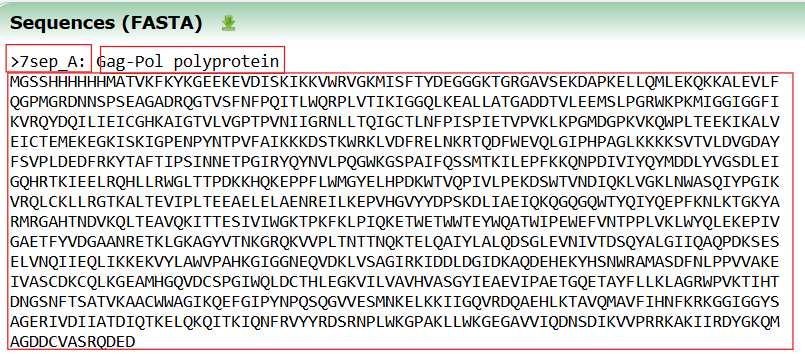

In [32]:
data = []

# Loop through each protein code to read its associated FASTA file
for index, row in tqdm(unique_protein_codes_df.iterrows(), total=unique_protein_codes_df.shape[0], desc="Processing", unit="row"):
    query_id = row["HIV Protein Code"]
    file_path = f"./dataset/hiv1_fasta_files/{query_id}.tsv"

    with open(file_path, "r") as file:
        lines = file.readlines()

    # Initialize variables to hold sequence data
    current_query = query_id
    current_title = row["title"]
    current_seq_code = None
    current_seq_title = ""
    current_sequence = ""

    for line in lines:
        line = line.strip()
        if line.startswith(">"):  
            # If there's an existing sequence, save it before processing the next one
            if current_seq_code:
                data.append([current_query, current_title, current_seq_code, current_seq_title, current_sequence])
            # Parse sequence header: ID and description
            current_seq_code = line[1:7]  # First 6 characters after '>'
            current_seq_title = line[8:]  # Description after ID
            current_sequence = ""        # Reset sequence buffer
        else:
            # Concatenate amino acid sequence lines
            current_sequence += line  

    # Append the last sequence after the loop ends
    if current_seq_code:
        data.append([current_query, current_title, current_seq_code, current_seq_title, current_sequence])

# Convert the collected data into a DataFrame with more descriptive column names
df_hiv_protein_sequence_info = pd.DataFrame(data, columns=[
    "protein_code",            # HIV protein code used in the query
    "protein_title",           # Title or description of the protein structure
    "sequence_id",             # Identifier from the FASTA header
    "sequence_description",    # Description text from the FASTA header
    "amino_acid_sequence"      # Actual amino acid sequence of the protein
])

Processing: 100%|██████████| 984/984 [00:11<00:00, 83.28row/s]


In [33]:
df_hiv_protein_sequence_info.head()

,protein_code,protein_title,sequence_id,sequence_description,amino_acid_sequence
0,7SEP,Cryo-EM Structure of the RT component of the H...,7sep_A,Gag-Pol polyprotein,MGSSHHHHHHMATVKFKYKGEEKEVDISKIKKVWRVGKMISFTYDE...
1,7SEP,Cryo-EM Structure of the RT component of the H...,7sep_B,Gag-Pol polyprotein,MGSSHHHHHHMATVKFKYKGEEKEVDISKIKKVWRVGKMISFTYDE...
2,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99,6oxu_A,Protease NL4-3,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
3,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99,6oxu_B,Protease NL4-3,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
4,1B92,MOBILITY OF AN HIV-1 INTEGRASE ACTIVE SITE LOO...,1b92_A,PROTEIN (INTEGRASE),MHGQVDCSPGIWQLDCTHLEGKVILVAVHVASGYIEAEVIPAETGQ...


In [34]:
df_hiv_protein_sequence_info.to_csv("./dataset/hiv-protein-sequence-info.csv", index=False)

# 10. Filtering HIV Protein Data by Key Functional Classes

This step filters the df_hiv_protein_sequence_info DataFrame to retain only entries related to key HIV protein classes: Protease, Reverse Transcriptase (RT), Envelope Glycoproteins, and Capsid. The filtering is based on the presence of specific keywords ("protease", "transcriptase", "glycoprotein", "capsid") found in the sequence_description column (case-insensitive).

In [36]:
df_hiv_protein_sequence_info = pd.read_csv("./dataset/hiv-protein-sequence-info.csv")
df_hiv_protein_sequence_info.head()

,protein_code,protein_title,sequence_id,sequence_description,amino_acid_sequence
0,7SEP,Cryo-EM Structure of the RT component of the H...,7sep_A,Gag-Pol polyprotein,MGSSHHHHHHMATVKFKYKGEEKEVDISKIKKVWRVGKMISFTYDE...
1,7SEP,Cryo-EM Structure of the RT component of the H...,7sep_B,Gag-Pol polyprotein,MGSSHHHHHHMATVKFKYKGEEKEVDISKIKKVWRVGKMISFTYDE...
2,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99,6oxu_A,Protease NL4-3,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
3,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99,6oxu_B,Protease NL4-3,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
4,1B92,MOBILITY OF AN HIV-1 INTEGRASE ACTIVE SITE LOO...,1b92_A,PROTEIN (INTEGRASE),MHGQVDCSPGIWQLDCTHLEGKVILVAVHVASGYIEAEVIPAETGQ...


In [38]:
df_hiv_protein_sequence_info["sequence_description"].value_counts()

sequence_description
: HIV-1 capsid protein                                                                           352
 Protease                                                                                        233
 Reverse transcriptase/ribonuclease H                                                            203
 Integrase                                                                                       190
 HIV-1 PROTEASE                                                                                  153
                                                                                                ... 
 Antibody PGT151 Fab heavy chain                                                                   1
 Antibody PGT151 Fab light chain                                                                   1
 5'-D(*CP*GP*TP*AP*TP*GP*CP*CP*TP*AP*TP*AP*GP*TP *TP*AP*TP*TP*GP*TP*GP*GP*CP*C)-3'                 1
 5'-R(*AP*UP*GP*AP*3DRP*GP*GP*CP*CP*AP*CP*AP*AP*UP*AP *AP*CP*UP*AP*UP*

In [43]:
# Define relevant keywords
keywords = ["protease", "transcriptase", "glycoprotein", "capsid"]
pattern = "|".join(keywords)

# Filter rows containing any of the keywords in the 'sequence_description' column (case-insensitive)
hiv_target_proteins = df_hiv_protein_sequence_info[
    df_hiv_protein_sequence_info["sequence_description"].str.contains(pattern, case=False, na=False)
].reset_index(drop=True)

hiv_target_proteins.to_csv("./dataset/hiv-protein-target-sequence-info.csv", index=False)


In [44]:
hiv_target_proteins.head()

,protein_code,protein_title,sequence_id,sequence_description,amino_acid_sequence
0,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99,6oxu_A,Protease NL4-3,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
1,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99,6oxu_B,Protease NL4-3,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
2,6P1I,Structure of HIV-1 Reverse Transcriptase (RT) ...,6p1i_A,Reverse transcriptase/ribonuclease H,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
3,1S6P,CRYSTAL STRUCTURE OF HUMAN IMMUNODEFICIENCY VI...,1s6p_A,POL polyprotein [Contains: Reverse transcript...,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
4,1S6P,CRYSTAL STRUCTURE OF HUMAN IMMUNODEFICIENCY VI...,1s6p_B,POL polyprotein [Contains: Reverse transcript...,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...


In [50]:
# Check if there are any sequence_description entries that do not contain
# any of the key functional keywords: 'protease', 'transcriptase', 'glycoprotein', or 'capsid'

excluded_descriptions = [
    desc for desc in hiv_target_proteins["sequence_description"].unique()
    if not any(keyword in desc.lower() for keyword in ["protease", "transcriptase", "glycoprotein", "capsid"])
]

# Display the descriptions that do not match the target functional categories (if any)


if not excluded_descriptions:
    print("✅ All sequence descriptions are relevant to key functional HIV proteins.")
else:
    print(excluded_descriptions)
    print("⚠️ Found descriptions unrelated to key functional classes:")

✅ All sequence descriptions are relevant to key functional HIV proteins.


# 11. HIV Type 1 Target Sequence Matching

## 11.1 Create DF For Seq Matching Result

In [52]:
seq_matching_df = comparison_result = pd.DataFrame(columns=['Seq Name 1', 'Seq Name 2', 'Seq 1', 'Seq 2', 'Alignment Score', 'Total Alignment', 'Similarities'])
seq_matching_df.head()

,Seq Name 1,Seq Name 2,Seq 1,Seq 2,Alignment Score,Total Alignment,Similarities


## 11.2 Sequence Matching Process

In [ ]:
# Output CSV path
output_file = "./dataset/seq-matching-result.csv"

# Create CSV file and write header if it doesn't exist
if not os.path.exists(output_file):
    with open(output_file, 'w') as f:
        f.write("seq_code1,seq_code2,seq1,seq2,alignment_score,total_alignment,similarities\n")

# Define function to compute sequence alignment between two proteins
def compute_alignment(protein1, protein2):
    seq1 = Seq(protein1.amino_acid_sequence)
    seq2 = Seq(protein2.amino_acid_sequence)

    # Perform global alignment using simple match scoring
    alignments = pairwise2.align.globalxx(seq1, seq2)
    alignment_score = alignments[0][2]
    total_alignment = alignments[0][4]
    
    # Calculate similarity percentage
    similarities = round(alignment_score / total_alignment * 100, 2)

    # Prepare result line
    result = (
        f"{protein1.sequence_id},{protein2.sequence_id},"
        f"{protein1.amino_acid_sequence},{protein2.amino_acid_sequence},"
        f"{alignment_score},{total_alignment},{similarities}\n"
    )

    # Append result to CSV file
    with open(output_file, 'a') as f:
        f.write(result)

# Convert dataframe rows to list of namedtuples
protein_list = list(hiv_target_proteins.itertuples(index=False))

# Generate all pairwise combinations (including self-comparisons)
protein_pairs = list(product(protein_list, repeat=2))

# Parallel processing of all protein sequence alignments
Parallel(n_jobs=-1, backend="loky")(
    delayed(compute_alignment)(p1, p2) for p1, p2 in tqdm(protein_pairs, desc="Comparing Progress")
)

print(f"Process completed! Results saved to {output_file}")

# 12. Filter Seq Matching Result with > 50% Similarities

## 12.1 Read Seq Matching Result File

In [57]:
seq_matching_result = pd.read_csv("./dataset/seq-matching-result.csv")
seq_matching_result.head()

,seq_code1,seq_code2,seq1,seq2,alignment_score,total_alignment,similarities
0,1ec2_A,1ec2_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.00
1,1ec2_A,1ec2_B,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.00
2,1ec2_A,2bpy_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.00
3,1ec2_A,2bpy_B,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.00
4,1ec2_A,7ma7_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,96.0,102,94.12


In [60]:
seq_matching_result.shape

(3553225, 7)

## 12.2 Filter Seq Matching Result - Similarities > 50%

In [58]:
seq_matching_result_filtered = seq_matching_result.loc[seq_matching_result['similarities'] > 50]
seq_matching_result_filtered.head()

,seq_code1,seq_code2,seq1,seq2,alignment_score,total_alignment,similarities
0,1ec2_A,1ec2_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.00
1,1ec2_A,1ec2_B,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.00
2,1ec2_A,2bpy_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.00
3,1ec2_A,2bpy_B,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.00
4,1ec2_A,7ma7_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,96.0,102,94.12


In [61]:
seq_matching_result_filtered.shape

(1014531, 7)

## 12.3 Problem

After performing sequence matching, a total of 3,553,225 pairwise comparisons were obtained. Following a filter to retain only results with similarity scores above 50%, the dataset was reduced to 1,014,531 entries. However, this number is still too large, and running graph clustering using DPClusO and BiClusO on such a dataset is extremely time-consuming.

Therefore, to accelerate the clustering process, I applied sampling on the filtered sequence matching results by selecting a subset per target protein type.

Note: This is not considered a best practice, but was done to manage computational constraints.

### 12.3.1 Protease DF

In [ ]:
protease_df = hiv_target_proteins[hiv_target_proteins["sequence_description"].str.contains("protease", case=False, na=False)]
protease_df.head()

,protein_code,protein_title,sequence_id,sequence_description,amino_acid_sequence
0,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99,6oxu_A,Protease NL4-3,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
1,6OXU,HIV-1 Protease NL4-3 WT in Complex with LR-99,6oxu_B,Protease NL4-3,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
7,7MAB,HIV-1 Protease (I84V) in Complex with GS-8374,7mab_A,Protease,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
8,7MAB,HIV-1 Protease (I84V) in Complex with GS-8374,7mab_B,Protease,PQITLWKRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
9,1D4J,HIV-1 protease in complex with the inhibitor M...,1d4j_A,HIV-1 PROTEASE,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...


In [ ]:
protease_count_df = protease_df.groupby('protein_code').agg(
    count=('sequence_id', 'count'),
    seq_codes=('sequence_id', lambda x: list(x))
).reset_index()

protease_count_sample = protease_count_df.sample(n=50, random_state=42)  # random_state untuk replikasi

protease_count_sample.head()

,protein_code,count,seq_codes
33,1GNO,2,"[1gno_A, 1gno_B]"
108,2QHC,2,"[2qhc_A, 2qhc_B]"
240,7M9O,2,"[7m9o_A, 7m9o_B]"
259,7MA8,2,"[7ma8_A, 7ma8_B]"
154,5HVP,2,"[5hvp_A, 5hvp_B]"


In [65]:
protease_seq = np.concatenate(protease_count_sample['seq_codes'].values)
len(protease_seq)

98

### 12.3.2 Transcriptase DF

In [67]:
transcriptase_df = hiv_target_proteins[hiv_target_proteins["sequence_description"].str.contains("transcriptase", case=False, na=False)]
transcriptase_df.head()

,protein_code,protein_title,sequence_id,sequence_description,amino_acid_sequence
2,6P1I,Structure of HIV-1 Reverse Transcriptase (RT) ...,6p1i_A,Reverse transcriptase/ribonuclease H,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
3,1S6P,CRYSTAL STRUCTURE OF HUMAN IMMUNODEFICIENCY VI...,1s6p_A,POL polyprotein [Contains: Reverse transcript...,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
4,1S6P,CRYSTAL STRUCTURE OF HUMAN IMMUNODEFICIENCY VI...,1s6p_B,POL polyprotein [Contains: Reverse transcript...,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
5,8U6H,Crystal Structure of HIV-1 Reverse Transcripta...,8u6h_A,Reverse transcriptase/ribonuclease H,MVPISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKE...
6,8U6H,Crystal Structure of HIV-1 Reverse Transcripta...,8u6h_C,Reverse transcriptase/ribonuclease H,MVPISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKE...


In [70]:
transcriptase_count_df = transcriptase_df.groupby('protein_code').agg(
    count=('sequence_id', 'count'),
    seq_codes=('sequence_id', lambda x: list(x))
).reset_index()

transcriptase_count_sample = transcriptase_count_df.sample(n=50, random_state=42)  # random_state untuk replikasi

transcriptase_count_sample.head()

,protein_code,count,seq_codes
287,7KWU,2,"[7kwu_A, 7kwu_B]"
329,8DXE,1,[8dxe_A]
323,7Z2G,2,"[7z2g_A, 7z2g_B]"
145,4B3Q,1,[4b3q_A]
55,1UWB,2,"[1uwb_A, 1uwb_B]"


In [71]:
transcriptase_seq = np.concatenate(transcriptase_count_sample['seq_codes'].values)
len(transcriptase_seq)

101

### 12.3.4 Glycoprotein DF

In [73]:
glycoprotein_df = hiv_target_proteins[hiv_target_proteins["sequence_description"].str.contains("glycoprotein", case=False, na=False)]
glycoprotein_df.head()

,protein_code,protein_title,sequence_id,sequence_description,amino_acid_sequence
64,6OPQ,CD4- and 17-bound HIV-1 Env B41 SOSIP frozen w...,6opq_A,Envelope glycoprotein gp160,MDAMKRGLCCVLLLCGAVFVSPSQEIHARFRRGARAAKKWVTVYYG...
65,6OPQ,CD4- and 17-bound HIV-1 Env B41 SOSIP frozen w...,6opq_C,Envelope glycoprotein gp41,AVGLGAFILGFLGAAGSTMGAASMALTVQARLLLSGIVQQQNNLLR...
66,6OPQ,CD4- and 17-bound HIV-1 Env B41 SOSIP frozen w...,6opq_D,T-cell surface glycoprotein CD4,METDTLLLWVLLLWVPGSTGKKVVLGKKGDTVELTCTASQKKSIQF...
67,6OPQ,CD4- and 17-bound HIV-1 Env B41 SOSIP frozen w...,6opq_F,Envelope glycoprotein gp160,MDAMKRGLCCVLLLCGAVFVSPSQEIHARFRRGARAAKKWVTVYYG...
68,6OPQ,CD4- and 17-bound HIV-1 Env B41 SOSIP frozen w...,6opq_H,Envelope glycoprotein gp41,AVGLGAFILGFLGAAGSTMGAASMALTVQARLLLSGIVQQQNNLLR...


In [ ]:
glycoprotein_count_df = glycoprotein_df.groupby('protein_code').agg(
    count=('sequence_id', 'count'),
    seq_codes=('sequence_id', lambda x: list(x))
).reset_index()

glycoprotein_count_sample = glycoprotein_count_df.sample(n=20, random_state=42)  # random_state untuk replikasi

glycoprotein_count_sample.head()

,protein_code,count,seq_codes
27,8FAE,6,"[8fae_A, 8fae_B, 8fae_C, 8fae_D, 8fae_E, 8fae_F]"
15,6OPQ,9,"[6opq_A, 6opq_C, 6opq_D, 6opq_F, 6opq_H, 6opq_..."
23,7Z3A,6,"[7z3a_A, 7z3a_B, 7z3a_C, 7z3a_D, 7z3a_E, 7z3a_F]"
17,6VPX,6,"[6vpx_A, 6vpx_B, 6vpx_C, 6vpx_D, 6vpx_E, 6vpx_F]"
8,6MUG,2,"[6mug_A, 6mug_D]"


In [75]:
glycoprotein_seq = np.concatenate(glycoprotein_count_sample['seq_codes'].values)
len(glycoprotein_seq)

126

### 12.3.5 Capsid DF

In [76]:
capsid_df = hiv_target_proteins[hiv_target_proteins["sequence_description"].str.contains("capsid", case=False, na=False)]
capsid_df.head()

,protein_code,protein_title,sequence_id,sequence_description,amino_acid_sequence
15,5O2U,Llama VHH in complex with p24,5o2u_A,Capsid protein p24,MGARASVLSGGELDKWEKIRLRPGGKKQYKLKHIVWASRELERFAV...
16,5O2U,Llama VHH in complex with p24,5o2u_C,Capsid protein p24,MGARASVLSGGELDKWEKIRLRPGGKKQYKLKHIVWASRELERFAV...
509,6SKK,Structure of the native full-length HIV-1 caps...,6skk_A,capsid protein,PIVQNIQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...
510,6SKK,Structure of the native full-length HIV-1 caps...,6skk_B,capsid protein,PIVQNIQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...
511,6SKK,Structure of the native full-length HIV-1 caps...,6skk_C,capsid protein,PIVQNIQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...


In [78]:
capsid_count_df = capsid_df.groupby('protein_code').agg(
    count=('sequence_id', 'count'),
    seq_codes=('sequence_id', lambda x: list(x))
).reset_index()

capsid_count_df = capsid_count_df[capsid_count_df['protein_code'] != "6X63"]

capsid_count_df.head()

,protein_code,count,seq_codes
0,5O2U,2,"[5o2u_A, 5o2u_C]"
1,6SKK,6,"[6skk_A, 6skk_B, 6skk_C, 6skk_D, 6skk_E, 6skk_F]"
3,7M9F,1,[7m9f_A]
4,7URN,7,"[7urn_A, 7urn_B, 7urn_C, 7urn_D, 7urn_E, 7urn_..."
5,8EJL,4,"[8ejl_A, 8ejl_B, 8ejl_C, 8ejl_F]"


In [79]:
capsid_seq = np.concatenate(capsid_count_df['seq_codes'].values)
len(capsid_seq)

20

### 12.3.6 List All Sub Seq Protein Code from Protease, Transcriptase, Glycoprotei, Capsid

In [80]:
seq = np.concatenate([protease_seq, transcriptase_seq, glycoprotein_seq, capsid_seq])
len(seq)

345

### 12.3.7 Filter Seq Mathching Filtered by "seq" list

In [81]:
seq_matching_result_filtered_2 = seq_matching_result_filtered[seq_matching_result_filtered['seq_code1'].isin(seq)]

In [84]:
seq_matching_result_filtered_2.head()

,seq_code1,seq_code2,seq1,seq2,alignment_score,total_alignment,similarities
0,1ec2_A,1ec2_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.0
1,1ec2_A,1ec2_B,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.0
40,1ec2_A,7wcq_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,98.0,100,98.0
58,1ec2_A,1hpv_A,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.0
59,1ec2_A,1hpv_B,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,99.0,99,100.0


# 13. Prepare the filtered sequence matching result (seq_matching_result_filtered_2) to include only seq_code1 and seq_code2 columns for graph clustering using DPClusO and BiClusO.

In [93]:
seq_matching_result_filtered_2_only_code = seq_matching_result_filtered_2.loc[:, "seq_code1":"seq_code2"].reset_index(drop="index")
seq_matching_result_filtered_2_only_code.head()

,seq_code1,seq_code2
0,1ec2_A,1ec2_A
1,1ec2_A,1ec2_B
2,1ec2_A,7wcq_A
3,1ec2_A,1hpv_A
4,1ec2_A,1hpv_B


## 13.1 Change Column Name seq_code1 to Protein 1 and seq_code2 to Protein 2

In [94]:
seq_matching_result_filtered_2_only_code.rename(columns={'seq_code1': 'Protein 1', 'seq_code2': 'Protein 2'}, inplace=True)
seq_matching_result_filtered_2_only_code.head()

,Protein 1,Protein 2
0,1ec2_A,1ec2_A
1,1ec2_A,1ec2_B
2,1ec2_A,7wcq_A
3,1ec2_A,1hpv_A
4,1ec2_A,1hpv_B


## 13.2 Delete Row if Protein 1 Value == Protein 2 Value

In [95]:
seq_matching_result_filtered_2_only_code = seq_matching_result_filtered_2_only_code[seq_matching_result_filtered_2_only_code['Protein 1'] != seq_matching_result_filtered_2_only_code['Protein 2']]
seq_matching_result_filtered_2_only_code.head()

,Protein 1,Protein 2
1,1ec2_A,1ec2_B
2,1ec2_A,7wcq_A
3,1ec2_A,1hpv_A
4,1ec2_A,1hpv_B
5,1ec2_A,1u8g_A


## 13.3 Save Seq Matching Filtered DF

In [96]:
seq_matching_result_filtered_2_only_code.to_csv("./dataset/seq_matching_result_solved.tsv", sep="\t", index=False)

# 14. Add "Cluster Information" to HIV 1 Filtered Original Dataset

In [108]:
hiv_target_proteins_df = pd.read_csv("./dataset/ayurvedic-knapsack-grouped-bindingdb-cleaner-exploded-hiv-only-n-query.csv")
hiv_target_proteins_df = hiv_target_proteins_df.drop("Unnamed: 0", axis=1)
hiv_target_proteins_df["cluster"] = None
hiv_target_proteins_df.head()

,C_ID,Name,Common Name,Scientific Name,Quantity,Non plant ingredient,Action,Application,Comments,Bacteria,...,InChIKey,InChICode,SMILES,target_name,species,bdb_id,ligand_smiles,pdb_link,query,cluster
0,"C00000003,","Anantadikwath (240gm), Drakshadi Kwath (40gm),...","Raisin, Grape, Purging Cassia, Long Melon, Cuc...","Vitis vinifera, Cassia fistula, Cucumis melo, ...","20gm, 10gm, 25gm, 380gm, 80gm, 100gm, 50gm","Salt, Sodium chioride: 10gm; Sea Shell, Gallip...","Curative curbancle, diarrhoea,Blood poisoning,...",NaN,NaN,"0.0, 1.0",...,IXORZMNAPKEEDV-BKYUDGNBNA-N,"InChI=1S/C19H22O6/c1-9-7-17-8-18(9,24)5-3-10(1...",C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@H](O...,Protease,(Human immunodeficiency virus type 1),BDBM50478896,C[C@H]1[C@@H]2CC[C@](C)(O)[C@@H]3[C@H]4[C@@H]5...,https://www.rcsb.org/search?request=%7B%22quer...,"9HVP,7YF6,7WCQ,7WBS,6OYR,6OYD,6OGP,6MCS,6MCR,5...",None
1,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Gag-Pol polyprotein [489-587],(Human immunodeficiency virus type 1),BDBM50613450,CC(=C)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2...,https://www.rcsb.org/search?request=%7B%22quer...,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1...",None
2,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Glycogen phosphorylase,(Human immunodeficiency virus type 1),BDBM50050957,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1...",None
3,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,muscle form,(Human immunodeficiency virus type 1),BDBM50050952,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1...",None
4,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Protein kinase C epsilon type,(Human immunodeficiency virus type 1),BDBM50050955,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1...",None


In [98]:
cluster_df = pd.read_excel("./dataset/cluster.xlsx")
cluster_df.head()

,Cluster,Sequence,Category
0,1,"3v6d_A, 3v6d_B, 3v6d_C, 3v6d_D, 8dx3_A, 5vqu_A...","HIV Reverse Transcriptase (RT), Seq Protease"
1,2,"1ec2_A, 1ec2_B, 7wcq_A, 1hpv_A, 1hpv_B, 1u8g_A...",HIV Protease
2,3,"5fuu_A, 5fuu_C, 5fuu_E, 6vpx_A, 6vpx_B, 6vpx_C...",HIV Envelope Glycoproteins
3,4,"5fuu_B, 5fuu_D, 5fuu_F, 6vpx_D, 6vpx_E, 6vpx_F...",HIV Envelope Glycoproteins
4,5,"7urn_A, 7urn_B, 7urn_C, 7urn_D, 7urn_E, 7urn_F...",HIV Capsid


In [ ]:
# Ensure 'cluster' column is initialized with empty lists if None
hiv_target_proteins_df["cluster"] = hiv_target_proteins_df["cluster"].apply(lambda x: [] if x is None else x)

# Iterate through each row in the HIV target protein DataFrame
for index_1, row_1 in hiv_target_proteins_df.iterrows():
    # Get the set of query protein codes from the 'query' column
    query = set(row_1["query"].split(','))
    c_id = row_1["C_ID"]
    clusters_to_add = []  # List to collect matching cluster IDs

    # Iterate through each cluster row in the cluster DataFrame
    for index_2, row_2 in cluster_df.iterrows():
        # Get the protein codes from the cluster and format them
        sequence = row_2["Sequence"].split(', ')
        sequence = [item[:4].upper() for item in sequence]  # Keep only first 4 characters and uppercase
        sequence = set(sequence)  # Convert to set for efficient intersection
        cluster = row_2["Cluster"]  # Get cluster ID
        
        # Find intersection between cluster sequence and query
        matching_items = list(set(sequence) & set(query))
        
        # If there is any match, add the cluster ID to the list
        if sequence & query:
            clusters_to_add.append(cluster)

    # Update the 'cluster' column with matched cluster IDs as comma-separated string
    hiv_target_proteins_df.at[index_1, "cluster"] = ", ".join(map(str, clusters_to_add)) if clusters_to_add else pd.NA

In [110]:
hiv_target_proteins_df.head()

,C_ID,Name,Common Name,Scientific Name,Quantity,Non plant ingredient,Action,Application,Comments,Bacteria,...,InChIKey,InChICode,SMILES,target_name,species,bdb_id,ligand_smiles,pdb_link,query,cluster
0,"C00000003,","Anantadikwath (240gm), Drakshadi Kwath (40gm),...","Raisin, Grape, Purging Cassia, Long Melon, Cuc...","Vitis vinifera, Cassia fistula, Cucumis melo, ...","20gm, 10gm, 25gm, 380gm, 80gm, 100gm, 50gm","Salt, Sodium chioride: 10gm; Sea Shell, Gallip...","Curative curbancle, diarrhoea,Blood poisoning,...",NaN,NaN,"0.0, 1.0",...,IXORZMNAPKEEDV-BKYUDGNBNA-N,"InChI=1S/C19H22O6/c1-9-7-17-8-18(9,24)5-3-10(1...",C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@H](O...,Protease,(Human immunodeficiency virus type 1),BDBM50478896,C[C@H]1[C@@H]2CC[C@](C)(O)[C@@H]3[C@H]4[C@@H]5...,https://www.rcsb.org/search?request=%7B%22quer...,"9HVP,7YF6,7WCQ,7WBS,6OYR,6OYD,6OGP,6MCS,6MCR,5...",2
1,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Gag-Pol polyprotein [489-587],(Human immunodeficiency virus type 1),BDBM50613450,CC(=C)[C@H]1CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2...,https://www.rcsb.org/search?request=%7B%22quer...,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1...",2
2,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Glycogen phosphorylase,(Human immunodeficiency virus type 1),BDBM50050957,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1...",2
3,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,muscle form,(Human immunodeficiency virus type 1),BDBM50050952,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1...",2
4,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...","Long Melon, Cucumber seed, Paddy, Bishop's Wee...","Cucumis melo, Cucumis sativus, Oryza sativa, T...","25gm, 380gm, 10gm, 40gm, 5gm, 80gm, 90gm, 100g...","Cow's Milk, 12L; Sugar, 9.6kg; , Rock Salt, So...","Curative for inflammation, strangury, Painful ...",NaN,NaN,"0.0, 1.0",...,RSQSQJNRHICNNH-DZBXMYAANA-N,InChI=1S/C19H24O5/c1-9-7-18-8-10(9)3-4-11(18)1...,C=C1C[C@]23C[C@H]1CC[C@H]2[C@@]12CC[C@H](O)[C@...,Protein kinase C epsilon type,(Human immunodeficiency virus type 1),BDBM50050955,CC(=C)[C@@H]1CC[C@@]2(CC[C@]3(C)[C@H](CC[C@@H]...,https://www.rcsb.org/search?request=%7B%22quer...,"1ODW,1HXB,1HIV,1W5Y,1W5X,1W5W,1W5V,1MES,1MER,1...",2


In [111]:
hiv_target_proteins_df.to_csv("./dataset/ayurvedic-knapsack-grouped-bindingdb-cleaner-exploded-hiv-only-n-query-cluster.csv")

# 15. Cluster, C_ID, Ayurvedic Formula

In [113]:
hiv_target_proteins_cluster_df = pd.read_csv("./dataset/ayurvedic-knapsack-grouped-bindingdb-cleaner-exploded-hiv-only-n-query-cluster.csv")
hiv_target_proteins_cluster_df.dropna(subset=["cluster"], inplace=True)
hiv_target_proteins_cluster_df = hiv_target_proteins_cluster_df[['C_ID', 'Name', 'cluster']]
hiv_target_proteins_cluster_df.head()

,C_ID,Name,cluster
0,"C00000003,","Anantadikwath (240gm), Drakshadi Kwath (40gm),...",2
1,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...",2
2,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...",2
3,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...",2
4,"C00000004,","Kushabaleha (5kg), Sukrasanjibani Modak (15.71...",2


In [114]:
data = []
for index, row in hiv_target_proteins_cluster_df.iterrows():
    cluster_list = row["cluster"].split(", ") 
    C_ID = row["C_ID"].strip(",")
    ayurvedic_formula = row["Name"]
    
    for cluster in cluster_list:  
        data.append([cluster, C_ID, ayurvedic_formula]) 
    
cluster_cid_name_df = pd.DataFrame(data, columns=["Cluster", "C_ID", "Name"])
cluster_cid_name_df = cluster_cid_name_df.sort_values(by="Cluster", ascending=True)

cluster_cid_name_df.head()

,Cluster,C_ID,Name
3289,1,C00013328,"Kutajadi Kwath (90gm), Pijushballi Ras (280gm)..."
4361,1,C00026107,"Kataphaladi Kwath (190gm), Chandanadi Kwath (1..."
1818,1,C00004082,Bamanamirita Ras (110gm)
4358,1,C00026095,"Kataphaladi Kwath (190gm), Chandanadi Kwath (1..."
1821,1,C00004089,"Shri Madanananda Modak (4.36kg), Kosturibhusha..."


In [116]:
cluster_cid_name_no_duplicate_df = pd.DataFrame()  

for cluster_num in range(1, 11):
    temp_df = cluster_cid_name_df[cluster_cid_name_df['Cluster'] == str(cluster_num)]
    temp_df = temp_df.drop_duplicates(subset=["C_ID", "Name"], keep="first")
    
    cluster_cid_name_no_duplicate_df = pd.concat([cluster_cid_name_no_duplicate_df, temp_df], ignore_index=True)

cluster_cid_name_no_duplicate_df.to_excel("./dataset/grouped_cid_by_cluster_v1.xlsx", index=False)
cluster_cid_name_no_duplicate_df.head()

,Cluster,C_ID,Name
0,1,C00013328,"Kutajadi Kwath (90gm), Pijushballi Ras (280gm)..."
1,1,C00026107,"Kataphaladi Kwath (190gm), Chandanadi Kwath (1..."
2,1,C00004082,Bamanamirita Ras (110gm)
3,1,C00026095,"Kataphaladi Kwath (190gm), Chandanadi Kwath (1..."
4,1,C00004089,"Shri Madanananda Modak (4.36kg), Kosturibhusha..."


In [117]:
cluster_cid_name_no_duplicate_df = cluster_cid_name_no_duplicate_df.groupby("Cluster", as_index=False).agg({
    "C_ID": lambda x: ', '.join(x),   # Gabungkan C_ID dengan koma
    "Name": lambda x: '; '.join(x)    # Gabungkan Name dengan titik koma
})

cluster_cid_name_no_duplicate_df["Cluster"] = cluster_cid_name_no_duplicate_df["Cluster"].astype(int)
cluster_cid_name_no_duplicate_df = cluster_cid_name_no_duplicate_df.sort_values(by="Cluster", ascending=True)

cluster_cid_name_no_duplicate_df.to_excel("./dataset/grouped_cid_by_cluster_v2.xlsx", index=False)

cluster_cid_name_no_duplicate_df.head()

,Cluster,C_ID,Name
0,1,"C00013328, C00026107, C00004082, C00026095, C0...","Kutajadi Kwath (90gm), Pijushballi Ras (280gm)..."
2,2,"C00029493, C00061416, C00029451, C00049970, C0...","Kshudabati Bati (2.304kg), Kshudhabati Gudika ..."
3,3,"C00029493, C00061416, C00000013, C00029724, C0...","Kshudabati Bati (2.304kg), Kshudhabati Gudika ..."
4,4,"C00029724, C00000012, C00000018, C00029493, C0...",Somnath Ras ?250gm); Sukrasanjibani Modak (15....
5,5,"C00000029, C00000009, C00000034, C00000027, C0...","Sukrasanjibani Modak (15.71kg), Bamanamirita R..."
